# Imports

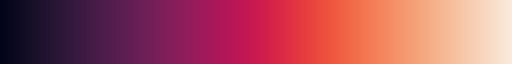

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import seaborn as sns
from collections import Counter
import ast
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

# Data Import & Set-Up

In [4]:
dir_path = "files/W_Paper_Files"

# RIO Test Results
cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
sorting_RIO = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
maillist_RIO = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])
hidden_RIO = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv", index_col=[0])

# BOCA Test Results
cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])
sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])
maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])
hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-RESULTS-0.csv", index_col=[0])

# Control Group (O2 In Default Order)
cacheprof_default = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-BIGRIO-0.csv", index_col=[0])
hidden_default = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
maillist_default =  pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
sorting_default = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])

# Add additional RIO Results
for i in range(1,4):
    cacheprof_RIO = pd.concat([cacheprof_RIO, pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    sorting_RIO= pd.concat([sorting_RIO, pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    maillist_RIO = pd.concat([maillist_RIO, pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])
    hidden_RIO = pd.concat([hidden_RIO, pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-{i}.csv", index_col=[0])])


# Fast Rule
# cacheprof_fast = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])
# hidden_fast = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])
# maillist_fast = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])
# sorting_fast = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])

# # Slow Rule
# cacheprof_slow = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])
# hidden_slow = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])
# maillist_slow = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])
# sorting_slow = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])

# New Slow + Fast Rule:
cacheprof_special = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
hidden_special = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
maillist_special = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])
sorting_special = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-PAPER-RESULTS-SPECIAL-RULE-10P-0.csv", index_col=[0])

# slow_tables = {"cacheprof": cacheprof_slow, "maillist": maillist_slow, "hidden": hidden_slow, "sorting": sorting_slow}
# fast_tables = tables = {"cacheprof": cacheprof_fast, "maillist": maillist_fast, "hidden": hidden_fast, "sorting": sorting_fast}
program_tables = {"cacheprof": {"BOCA": cacheprof_BOCA, "RIO": cacheprof_RIO, "O2": cacheprof_default}, "sorting": {"BOCA": sorting_BOCA, "RIO": sorting_RIO, "O2": sorting_default}, "hidden": {"BOCA": hidden_BOCA, "RIO":  hidden_RIO, "O2": hidden_default}, "maillist": {"BOCA": maillist_BOCA, "RIO": maillist_RIO, "O2": maillist_default}}
correctness_tables = {"cacheprof": cacheprof_special, "hidden": hidden_special, "maillist": maillist_special, "sorting": sorting_special}

FileNotFoundError: [Errno 2] No such file or directory: 'files/W_Paper_Files/cacheprof-PHASEORDER-Iterative-PO-PAPER-RIO-RESULTS-0.csv'

# Normalization Results

## Z-Score

In [ ]:
normalized_tables = {}
tick_labels = []

for d_name, d in program_tables.items():
    for type, t in d.items():
        t["Norm-Z"] = (t["Runtime"] - t["Runtime"].mean())/t["Runtime"].std()
        t.drop(columns=["Mode"])

## O2

In [ ]:
for d_name, d in program_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    for type, t in d.items():
        normalize_around = O2_numbers
        offset = normalize_around - t["Runtime"].mean()
        t["Norm-Default"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()

## Data Visualization

### Z-Score Plots

In [ ]:
fig, ax = plt.subplots()

program_name = "cacheprof"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_cacheprof.svg", format="svg")
plt.show()

In [ ]:
fig, ax = plt.subplots()

program_name = "sorting"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_sorting.svg", format="svg")
plt.show()

In [ ]:
fig, ax = plt.subplots()

program_name = "hidden"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_hidden.svg", format="svg")
plt.show()

In [ ]:
fig, ax = plt.subplots()

program_name = "maillist"

lst1 = []
labels = []
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(program_name)

plt.savefig("PO_Z_maillist.svg", format="svg")
plt.show()

### O2 Plots

In [ ]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "cacheprof"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_cacheprof.svg", format="svg")
plt.show()

In [ ]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "sorting"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_sorting.svg", format="svg")
plt.show()

In [ ]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "maillist"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_maillist.svg", format="svg")
plt.show()

In [ ]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "hidden"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (std)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.savefig("PO_O2_hidden.svg", format="svg")
plt.show()

# Table of Improvement

In [ ]:

# THIS IS USING THE BEST RUNTIME

data = []
programs = list(program_tables.keys())
configurations = ["BOCA", "RIO"]
columns = ["Optimal", "Default", "Improvement", "Avg. Improvement"]

for program in programs:
    program_data = []
    row_O0s = []
    row_O2s = []
    for config in configurations:
        if program_tables[program][config] is not None:
            row_Optimal = round(program_tables[program][config].sort_values("Runtime", ascending=True).iloc[0]["Runtime"],3)
            row_Default = round(program_tables[program]["O2"]["Runtime"].mean(),3)
            improvement = f"{round(-1*(1 - row_Optimal/row_Default)*100,3)}%"
            average = f"{round(-1*(1 - program_tables[program][config]['Runtime'].mean()/row_Default)*100,3)}%"
            program_data.append([row_Optimal, row_Default, improvement, average])
            row_O0s.append(row_Optimal)
            row_O2s.append(row_Default)
        else:
            program_data.append([None, None, None])
    data.extend(program_data)
    
    # for config in configurations:
    #     updated_program_tables[program][config]["-O0"]["Runtime"] = round(np.mean(row_O0s),3)
    #     row_O2 = updated_program_tables[program][config]["-O2"]["Runtime"] = round(np.mean(row_O2s),3)

# Create a MultiIndex with program and configuration levels
index = pd.MultiIndex.from_product([programs, configurations], names=["Program", "Configuration"])

# print(index)
# print(data)

# Reshape data into a DataFrame
df = pd.DataFrame(data, columns=columns)


# Assign the MultiIndex
df.index = index


print(df)
df.to_csv("PO_table_results.csv")


In [ ]:
BOCA_row_Optimal = program_tables["sorting"]["BOCA"].sort_values("Runtime", ascending=True).iloc[0]["Phase"]
RIO_row_Optimal = program_tables["sorting"]["RIO"].sort_values("Runtime", ascending=True).iloc[0]["Phase"]

print(BOCA_row_Optimal)
print(RIO_row_Optimal)

# Correctness Stuff

In [ ]:
def has_required_tuples(tuple_list):
    for tup in  [("my_good_optimization", "my_neutral_optimization"), ("my_bad_optimization", "my_neutral_optimization")]:
        if tup in tuple_list:
            return True
    return False

def which_tuple(tuple_list):
    if ("my_good_optimization", "my_neutral_optimization") in tuple_list and ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Both"
    elif ("my_good_optimization", "my_neutral_optimization") in tuple_list:
        return "Good Only"
    elif ("my_bad_optimization", "my_neutral_optimization") in tuple_list:
        return "Bad Only"

## Plot 1

In [ ]:

colors = ["blue", "red", "purple"]

# Scatter plot

count = 0
for program_name, df in correctness_tables.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)
    sns.scatterplot(x=filtered_df["Iteration"], y=filtered_df["Rules"], marker='o', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), s=100, label=program_name)
    count += 1

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Category')
plt.title('Special Rule Distributions')

# Show the legend
plt.legend()

# Show the plot
plt.savefig('Slow_Scatter.png')
plt.show()


## Plot 2

In [ ]:
fig, axes = plt.subplots(4, 1)
colors = ["blue", "red", "purple"]
# labels = ["Both", "Slow", "Fast"]

# Scatter plot

count = 0
handles = []  # Collect handles from all scatter plots
labels = []   # Collect labels from all scatter plots
for program_name, df in correctness_tables.items():
    df_temp = df[["Iteration", "Rules", "Runtime"]]
    df_temp["Rules"] = df_temp["Rules"].apply(ast.literal_eval)
    filtered_df = df_temp[df_temp['Rules'].apply(has_required_tuples)]
    filtered_df["Rules"] = filtered_df["Rules"].apply(which_tuple)
    count_2 = 0
    scatter = sns.scatterplot(x=filtered_df["Iteration"], y=filtered_df["Rules"], marker='o', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), s=100, label=program_name, ax=axes[count], legend=False)
    handles.append(scatter.collections[0])  # Append handle for legend
    labels.append(program_name)  # Append label for legend
    count_2 += 1
        
    # Set custom y-axis labels
    y_labels = filtered_df["Rules"].unique()
    axes[count].set_yticks(range(len(y_labels)))
    axes[count].set_yticklabels(y_labels)
    
    axes[count].set_title(None)
    axes[count].set_xlabel(None)
    axes[count].set_ylabel(None)
    
    # Adjust y-axis limits to prevent clipping of markers
    y_min = -0.5  # Add some padding at the bottom
    y_max = len(y_labels) - 0.5  # Adjust based on the number of categories
    axes[count].set_ylim(y_min, y_max)
    count += 1

# Add labels and title
# plt.xlabel('Iteration')
# plt.ylabel('Category')
fig.supxlabel('Iteration')
fig.supylabel('Category')
fig.suptitle("Special Rule Distributions")

# Show the legend
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right')
# plt.legend(title="Y-Values", labels=["Value 0", "Value 1", "Value 2"])

# Show the plot
fig.tight_layout()
plt.savefig('Slow_Scatter.png')
plt.show()


# Shared Rules

In [ ]:
good_rules = ["liberate_case","spec_constr","rule_check2","late_specialise","triple_combo","late_dmd_anal","strict_anal","rule_check3","add_caller","add_late"]
bad_rules = ["static_args","presimplify","specialise","full_laziness_1","simpl3","float_in_1","call_arity","strictness","exitification","full_laziness_2","cse","final","rule_check1"]

def order_string_to_order_array(order_string):
    return list(filter(lambda x: x != '', order_string.split("|")))

def generate_BOCA_rules(order_array):
    # Creates rules for orderings. For example ("A", "B") => "A must go before B"
    combined_list = bad_rules + good_rules
    if (len(combined_list) != len(order_array)):
        raise ValueError(f"What the hell?: Combined List: {len(combined_list)}, Order List: {len(order_array)} \n {order_array}")
    rules_list = []
    blank_list = [None] * (len(combined_list))
    for index, optimization in enumerate(combined_list):
        pos_num = int(order_array[index])
        blank_list[pos_num] = optimization
    for index, opt_A in enumerate(blank_list):
        for opt_B in blank_list[index:]:
            if opt_A != opt_B:
                rules_list.append((opt_A, opt_B))
    # print(rules_list)
    # print(f"Order Array Length: {len(self.order_array)}")
    # print(f"Rules Length: {len(rules_list)}")
    return rules_list

def generate_all_possible_valid_rules():
    # Uses the movable optimization list to create possible pairs. Does not touch the invalid list.
    all_rules = []
    for opt_A in good_rules:
        for opt_B in good_rules:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

def generate_all_possible_rules():
    all_rules = []
    combined_list = bad_rules + good_rules
    for opt_A in combined_list:
        for opt_B in combined_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [ ]:
all_possible_rules = generate_all_possible_rules()
all_valid_rules = generate_all_possible_valid_rules()
all_default_rules = list(set(all_possible_rules) - set(all_valid_rules))

default_ordering_rules = generate_BOCA_rules(order_string_to_order_array("0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22"))

In [ ]:
top_entries = []

for program_name, tables in program_tables.items():
    for model, t in tables.items():
        top_entries_t = []
        if model == "BOCA":
            t['Rules'] = t['Rules'].apply(ast.literal_eval)
            df_sorted = t.sort_values("Runtime", ascending=True)
            top_entries.append(list(df_sorted[df_sorted["Runtime"] <= program_tables[program_name]["O2"]["Runtime"].mean()]["Rules"]))

tuple_count_per_program = []

for program in top_entries:
    flat_list = list(set([item for sublist in program for item in sublist]) - set(all_default_rules))
    tuple_count_per_program.append(Counter(flat_list))

big_counter = Counter()

for program_counter in tuple_count_per_program:
    big_counter += program_counter

top_counter_25 = big_counter.most_common(10)

print("Top 25 Elements:")
for element, count in top_counter_25:
    print(f"{element},")

In [ ]:
def __get_expected_improvement(self, pred):
    pred = np.array(pred).transpose(1, 0)
    m = np.mean(pred, axis=1)
    s = np.std(pred, axis=1)

    def calculate_f():
        z = (self.best_candidate.runtime - m) / s
        return (self.best_candidate.runtime - m) * norm.cdf(z) + s * norm.pdf(z)

    if np.any(s == 0.0):
        s_copy = np.copy(s)
        s[s_copy == 0.0] = 1.0
        f = calculate_f()
        f[s_copy == 0.0] = 0.0
    else:
        f = calculate_f()

    return f

In [ ]:
rf = RandomForestRegressor()
all_rules = generate_all_possible_rules()
df = pd.DataFrame(columns=all_rules + ["Runtime"])

## Concat all BOCA tables together

big_BOCA_table = pd.DataFrame(columns=cacheprof_BOCA.columns)

for program_name, configs in program_tables.items():
    for config_name, t in configs.items():
        if config_name == "BOCA":
            big_BOCA_table = pd.concat([big_BOCA_table, t])


for index, boca_row in big_BOCA_table.iterrows():
    new_row = [None] * len(all_rules)
    for index, r in enumerate(all_rules):
        if r in boca_row.Rules:
            new_row[index] = 1
        else:
            new_row[index] = 0
    new_row.append(boca_row.Runtime)
    df.loc[len(df.index)] = new_row


X_train = df.drop("Runtime", axis=1)
y_train = df["Runtime"]


if len(X_train) != len(y_train):
    raise RuntimeError("Somehow we have more runtimes than we do presets!")

rf.fit(X_train, y_train)

all_candidates = []

for index, boca_row in big_BOCA_table.iterrows():
    all_candidates.append(list(set(boca_row.Rules).union(set(list(map(lambda x: x[0], top_counter_25))))))

for index, candidate in enumerate(all_candidates):
    # candidate = (lambda A, B, e: B[A.index(e)] if e in A else None)(self.flags,)
    results = []
    trees = rf.estimators_
    for t in trees:
        big_list = [None] * len(all_rules)
        for index, rule in enumerate(all_rules):
            if rule in candidate:
                big_list[index] = 1
            else:
                big_list[index] = 0

        result = t.predict(np.array(big_list).reshape(1, -1))
        results.append(result)
    # rf.predict(np.array(candidate.flag_bits).reshape(1,-1)) # Breaks with the paper. Paper has mean and std
    # print(f'Result: {result}')
    candidate.expected_improvement = get_expected_improvement(results)